# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
users = pd.read_csv('dataset/users_data.csv')
cards = pd.read_csv('dataset/cards_data.csv')
transactions = pd.read_csv('dataset/transactions_data.csv')

# Load mcc_codes.json (Series) as DataFrame
mcc_codes = pd.read_json('dataset/mcc_codes.json', typ='series').reset_index()
mcc_codes.columns = ['mcc_code', 'mcc_description']

# Load fraud_labels.json (Series) as DataFrame
fraud_labels = pd.read_json('dataset/train_fraud_labels.json').reset_index()
fraud_labels.columns = ['transaction_id', 'is_fraud']

In [2]:
users.head(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
cards.head(5)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [4]:
transactions.head(5)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [5]:
mcc_codes.head(5)

,mcc_code,mcc_description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [6]:
fraud_labels.head(5)

,transaction_id,is_fraud
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No


# Merge & Preprocessing

In [7]:
# Đổi tên cột cho rõ ràng trước khi merge
users = users.rename(columns={'id': 'user_id'})
cards = cards.rename(columns={'id': 'card_id', 'client_id': 'user_id'})
transactions = transactions.rename(columns={'id': 'transaction_id'})

# Merge cards với users theo user_id
cards_users = pd.merge(cards, users, on='user_id', how='inner')
# Merge transactions với cards_users theo card_id
transactions_full = pd.merge(transactions, cards_users, on='card_id', how='inner')
# Merge với mcc_codes theo mcc
transactions_full = pd.merge(transactions_full, mcc_codes, left_on='mcc', right_on='mcc_code', how='inner')
# Merge với fraud_labels theo transaction_id
transactions_full = pd.merge(transactions_full, fraud_labels, left_on='transaction_id', right_on='transaction_id', how='left')

In [8]:
transactions_full.head(20)

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_code,mcc_description,is_fraud
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,46.80,-100.76,$23679,$48277,$110153,740,4,5499,Miscellaneous Food Stores,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,40.80,-91.12,$18076,$36853,$112139,834,5,5311,Department Stores,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,33.18,-117.29,$16894,$34449,$36540,686,3,4829,Money Transfer,No
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,41.42,-87.35,$26168,$53350,$128676,685,5,4829,Money Transfer,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,38.86,-76.60,$33529,$68362,$96182,711,2,5813,Drinking Places (Alcoholic Beverages),No
5,7475333,2010-01-01 00:07:00,1807,165,$4.81,Swipe Transaction,20519,Bronx,NY,10464.0,...,40.84,-73.87,$25537,$52065,$98613,828,5,5942,Book Stores,No
6,7475334,2010-01-01 00:09:00,1556,2972,$77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,46.80,-100.76,$23679,$48277,$110153,740,4,5499,Miscellaneous Food Stores,NaN
7,7475335,2010-01-01 00:14:00,1684,2140,$26.46,Online Transaction,39021,ONLINE,NaN,NaN,...,36.34,-83.28,$13668,$27861,$108313,782,5,4784,Tolls and Bridge Fees,No
8,7475336,2010-01-01 00:21:00,335,5131,$261.58,Online Transaction,50292,ONLINE,NaN,NaN,...,26.74,-80.12,$27696,$56467,$66565,688,3,7801,"Athletic Fields, Commercial Sports",NaN
9,7475337,2010-01-01 00:21:00,351,1112,$10.74,Swipe Transaction,3864,Flushing,NY,11355.0,...,40.77,-73.84,$13810,$17150,$375,807,6,5813,Drinking Places (Alcoholic Beverages),NaN


In [9]:
# Chuyển đổi các cột có ký tự $ từ object (chuỗi có ký tự $) sang float cho toàn bộ phân tích
cols = ['amount', 'yearly_income', 'total_debt', 'credit_limit', 'per_capita_income']
transactions_full[cols] = transactions_full[cols].replace('[\$,]', '', regex=True).astype(float)
transactions_full[cols].head()

,amount,yearly_income,total_debt,credit_limit,per_capita_income
0,-77.00,48277.0,110153.0,55.0,23679.0
1,14.57,36853.0,112139.0,9100.0,18076.0
2,80.00,34449.0,36540.0,14802.0,16894.0
3,200.00,53350.0,128676.0,37634.0,26168.0
4,46.41,68362.0,96182.0,19113.0,33529.0


In [10]:
# Map state code to full name
state_name_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia', 'AA': 'Armed Forces Americas'
}
transactions_full['merchant_state_full'] = transactions_full['merchant_state'].map(state_name_map)

In [11]:
transactions_full.head(20)

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,mcc_code,mcc_description,is_fraud,merchant_state_full
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,-100.76,23679.0,48277.0,110153.0,740,4,5499,Miscellaneous Food Stores,No,North Dakota
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,-91.12,18076.0,36853.0,112139.0,834,5,5311,Department Stores,No,Iowa
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,-117.29,16894.0,34449.0,36540.0,686,3,4829,Money Transfer,No,California
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,-87.35,26168.0,53350.0,128676.0,685,5,4829,Money Transfer,NaN,Indiana
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,-76.60,33529.0,68362.0,96182.0,711,2,5813,Drinking Places (Alcoholic Beverages),No,Maryland
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,...,-73.87,25537.0,52065.0,98613.0,828,5,5942,Book Stores,No,New York
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,-100.76,23679.0,48277.0,110153.0,740,4,5499,Miscellaneous Food Stores,NaN,North Dakota
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,NaN,NaN,...,-83.28,13668.0,27861.0,108313.0,782,5,4784,Tolls and Bridge Fees,No,NaN
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,NaN,NaN,...,-80.12,27696.0,56467.0,66565.0,688,3,7801,"Athletic Fields, Commercial Sports",NaN,NaN
9,7475337,2010-01-01 00:21:00,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355.0,...,-73.84,13810.0,17150.0,375.0,807,6,5813,Drinking Places (Alcoholic Beverages),NaN,New York


# EDA

## 1. Top 3 Khu Vực Có Lượng Giao Dịch Lừa Đảo Lớn Nhất

In [42]:
fraud_data = transactions_full[transactions_full['is_fraud'].str.lower() == 'yes']

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1755961397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


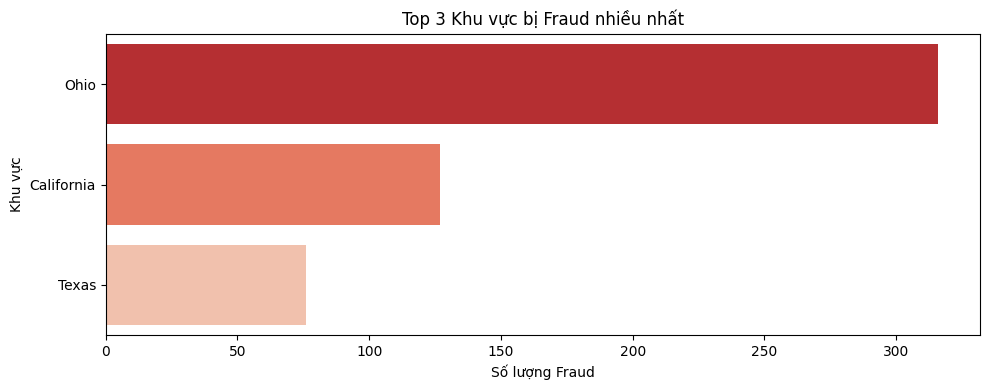

In [43]:
# Vẽ biểu đồ top 3 khu vực bị fraud nhiều nhất
plt.figure(figsize=(10,4))
sns.countplot(
    data=fraud_data,
    y='merchant_state_full',
    order=fraud_data['merchant_state_full'].value_counts().index[:3],
    palette='Reds_r'
)
plt.title('Top 3 Khu vực bị Fraud nhiều nhất')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Khu vực')
plt.tight_layout()
plt.show()

### Phân tích chi tiết từng khu vực top 3

### 1. Ohio

In [44]:
# Lọc ra các giao dịch ở Ohio để phân tích
fraud_ohio = transactions_full[transactions_full['merchant_state_full'] == 'Ohio']

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\3625678340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_mcc_ohio.index, x=top_mcc_ohio.values, palette='Reds_r')


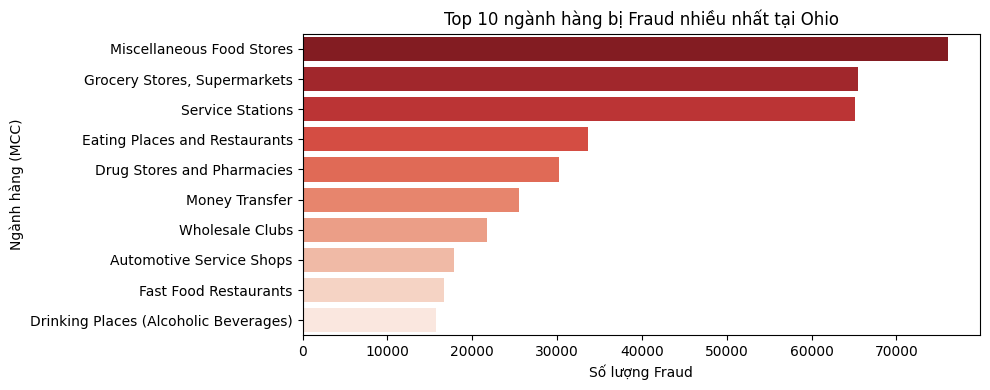

In [45]:
# Ngành hàng bị fraud nhiều nhất ở Ohio
plt.figure(figsize=(10,4))
top_mcc_ohio = fraud_ohio['mcc_description'].value_counts().head(10)
sns.barplot(y=top_mcc_ohio.index, x=top_mcc_ohio.values, palette='Reds_r')
plt.title('Top 10 ngành hàng bị Fraud nhiều nhất tại Ohio')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1453682798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_ohio, x='gender', palette='Reds_r')


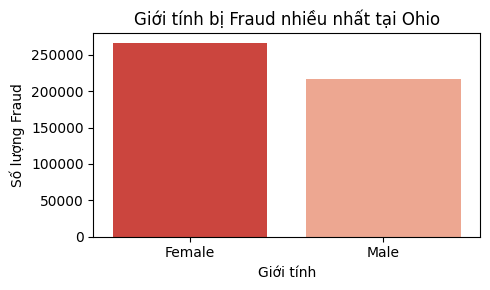

In [46]:
# Giới tính bị fraud tại Ohio
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_ohio, x='gender', palette='Reds_r')
plt.title('Giới tính bị Fraud nhiều nhất tại Ohio')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

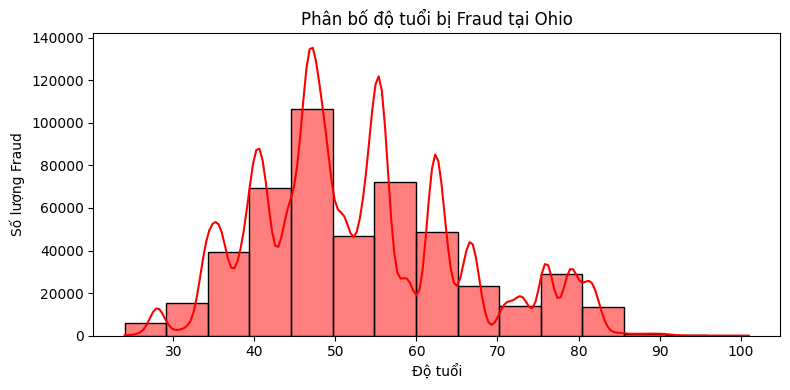

In [47]:
# Độ tuổi bị fraud nhiều nhất ở Ohio
plt.figure(figsize=(8,4))
sns.histplot(fraud_ohio['current_age'], bins=15, kde=True, color='red')
plt.title('Phân bố độ tuổi bị Fraud tại Ohio')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1469005241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_mcc_ohio_u50.index, x=top_mcc_ohio_u50.values, palette='Reds_r')


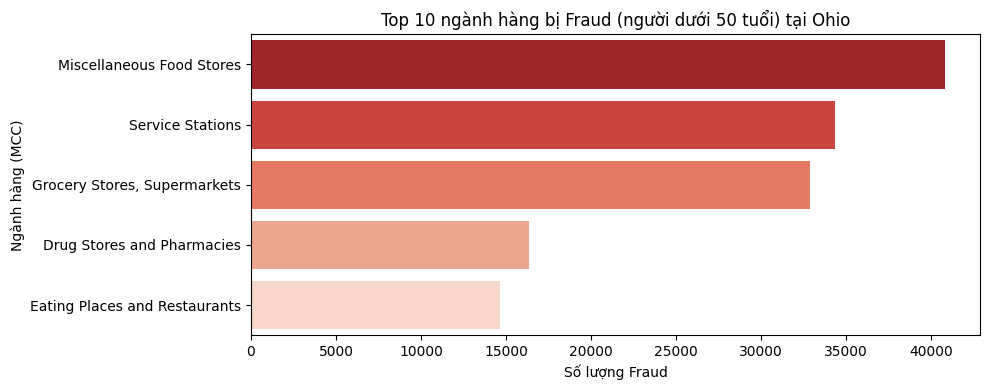

In [48]:
fraud_ohio_u50 = fraud_ohio[fraud_ohio['current_age'] < 50]
top_mcc_ohio_u50 = fraud_ohio_u50['mcc_description'].value_counts().head(5)

plt.figure(figsize=(10,4))
sns.barplot(y=top_mcc_ohio_u50.index, x=top_mcc_ohio_u50.values, palette='Reds_r')
plt.title('Top 10 ngành hàng bị Fraud (người dưới 50 tuổi) tại Ohio')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1755019273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_mcc_ohio_u50.index, x=top_mcc_ohio_u50.values, palette='Reds_r')


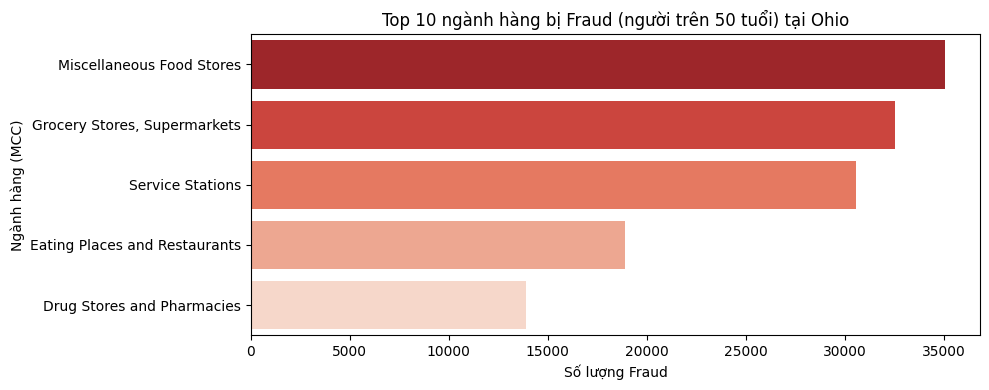

In [49]:
fraud_ohio_u50 = fraud_ohio[fraud_ohio['current_age'] > 50]
top_mcc_ohio_u50 = fraud_ohio_u50['mcc_description'].value_counts().head(5)

plt.figure(figsize=(10,4))
sns.barplot(y=top_mcc_ohio_u50.index, x=top_mcc_ohio_u50.values, palette='Reds_r')
plt.title('Top 10 ngành hàng bị Fraud (người trên 50 tuổi) tại Ohio')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()

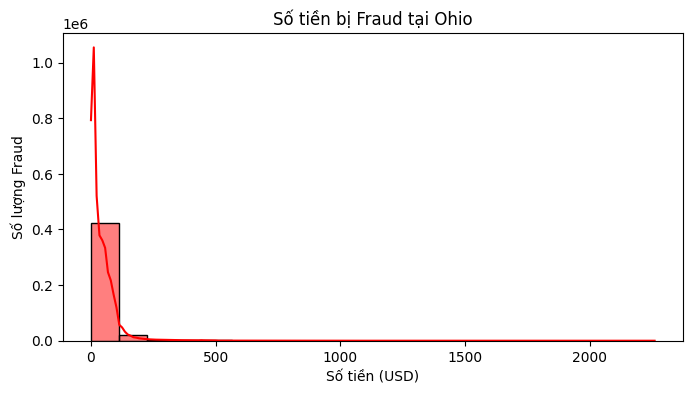

In [50]:
# Phân phối số tiền bị fraud ở Ohio
fraud_ohio_amounts_pos = fraud_ohio[fraud_ohio['amount'] > 0]['amount']

plt.figure(figsize=(8,4))
sns.histplot(fraud_ohio_amounts_pos, bins=20, kde=True, color='red')
plt.title('Số tiền bị Fraud tại Ohio')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng Fraud')
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\386282169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=fraud_ohio_year, palette='Reds_r')


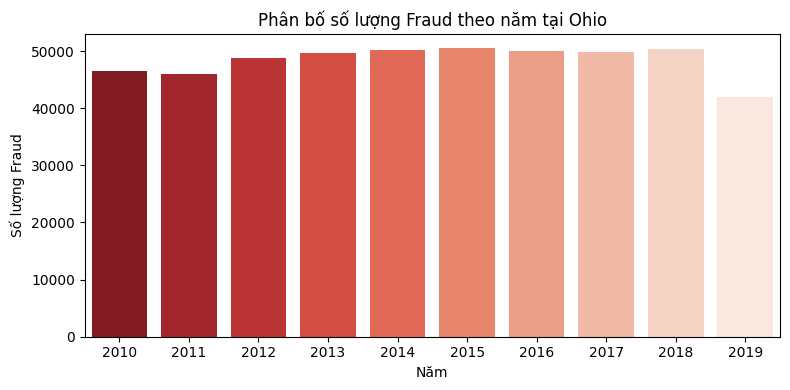

In [51]:
# Số lượng fraud theo năm ở Ohio
fraud_ohio_year = fraud_ohio.dropna(subset=['date']).copy()
fraud_ohio_year['year'] = pd.to_datetime(fraud_ohio_year['date']).dt.year
plt.figure(figsize=(8,4))
sns.countplot(x='year', data=fraud_ohio_year, palette='Reds_r')
plt.title('Phân bố số lượng Fraud theo năm tại Ohio')
plt.xlabel('Năm')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

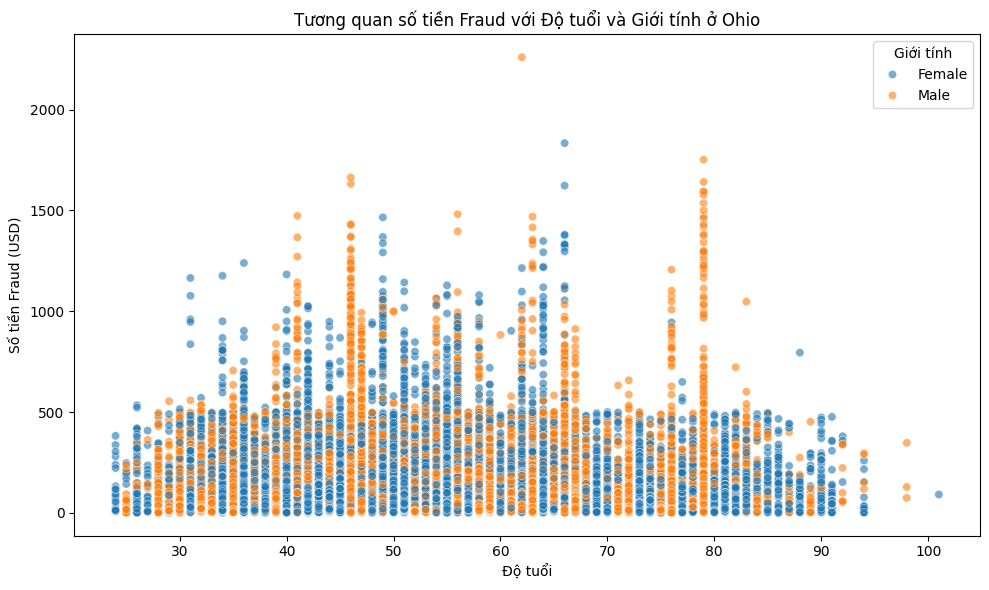

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=fraud_ohio[fraud_ohio['amount'] > 0], 
    x='current_age', 
    y='amount', 
    hue='gender', 
    alpha=0.6
)
plt.title('Tương quan số tiền Fraud với Độ tuổi và Giới tính ở Ohio')
plt.xlabel('Độ tuổi')
plt.ylabel('Số tiền Fraud (USD)')
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\4250412902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_ohio, x='card_type', palette='Reds_r')


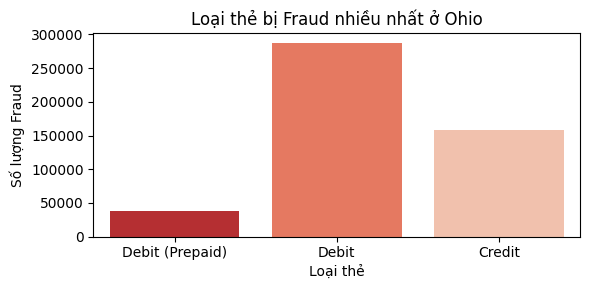

In [53]:
# Loại thẻ bị Fraud nhiều nhất ở Ohio
plt.figure(figsize=(6,3))
sns.countplot(data=fraud_ohio, x='card_type', palette='Reds_r')
plt.title('Loại thẻ bị Fraud nhiều nhất ở Ohio')
plt.xlabel('Loại thẻ')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\474209650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_ohio, x='use_chip', palette='Reds_r')


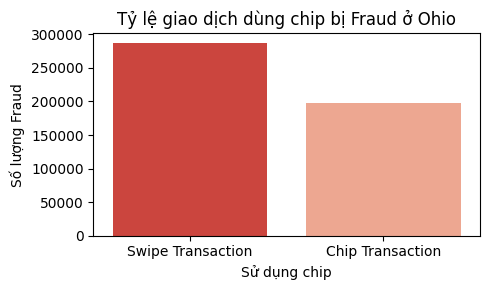

In [54]:
# Tỷ lệ giao dịch dùng chip bị Fraud ở Ohio
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_ohio, x='use_chip', palette='Reds_r')
plt.title('Tỷ lệ giao dịch dùng chip bị Fraud ở Ohio')
plt.xlabel('Sử dụng chip')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

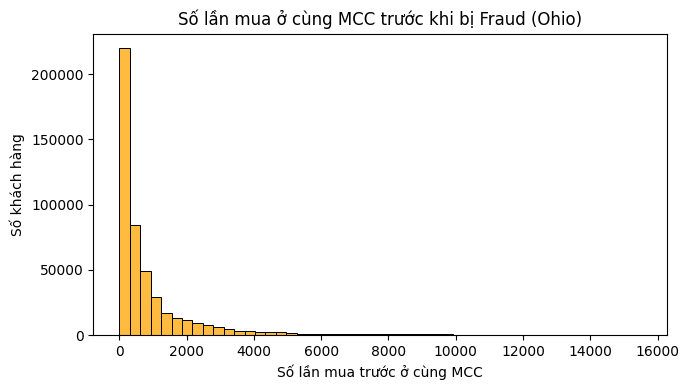

In [55]:
# Tính số lần mua ở cùng MCC trước khi bị Fraud (Ohio)
fraud_ohio_sorted = fraud_ohio.sort_values(['user_id', 'mcc', 'date'])
transactions_full_sorted = transactions_full.sort_values(['user_id', 'mcc', 'date'])

# Đánh số thứ tự giao dịch theo user_id, mcc
transactions_full_sorted['mcc_count'] = transactions_full_sorted.groupby(['user_id', 'mcc']).cumcount()

# Merge để lấy số lần mua trước ở cùng MCC cho từng giao dịch fraud
fraud_ohio_merged = pd.merge(
    fraud_ohio_sorted,
    transactions_full_sorted[['transaction_id', 'mcc_count']],
    on='transaction_id',
    how='left'
)

plt.figure(figsize=(7,4))
sns.histplot(fraud_ohio_merged['mcc_count'], bins=50, color='orange')
plt.title('Số lần mua ở cùng MCC trước khi bị Fraud (Ohio)')
plt.xlabel('Số lần mua trước ở cùng MCC')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()

### 1.1 California

In [73]:
# Lọc ra các giao dịch ở California để phân tích
fraud_california = transactions_full[transactions_full['merchant_state_full'] == 'California']

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1813403047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_mcc_california.index, x=top_mcc_california.values, palette='Reds_r')


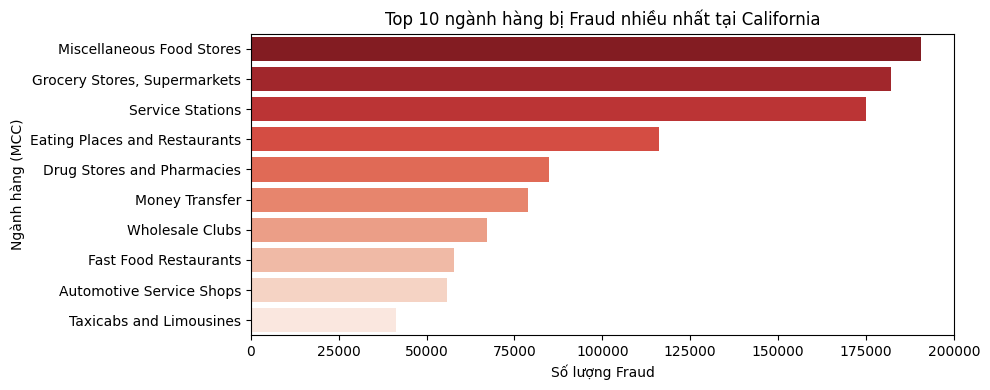

In [57]:
# Ngành hàng bị fraud nhiều nhất ở California
plt.figure(figsize=(10,4))
top_mcc_california = fraud_california['mcc_description'].value_counts().head(10)
sns.barplot(y=top_mcc_california.index, x=top_mcc_california.values, palette='Reds_r')
plt.title('Top 10 ngành hàng bị Fraud nhiều nhất tại California')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\1746586233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_california, x='gender', palette='Reds_r')


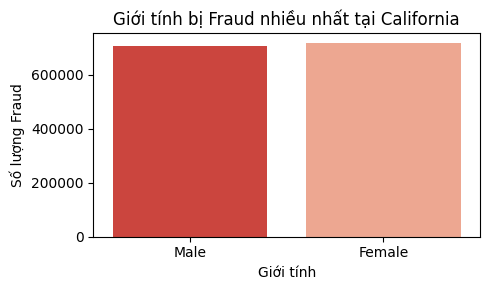

In [58]:
# Giới tính bị fraud tại California
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_california, x='gender', palette='Reds_r')
plt.title('Giới tính bị Fraud nhiều nhất tại California')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

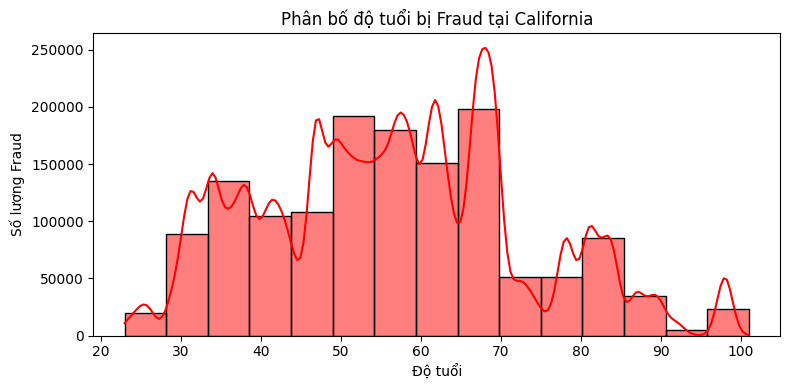

In [59]:
# Độ tuổi bị fraud nhiều nhất ở California
plt.figure(figsize=(8,4))
sns.histplot(fraud_california['current_age'], bins=15, kde=True, color='red')
plt.title('Phân bố độ tuổi bị Fraud tại California')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

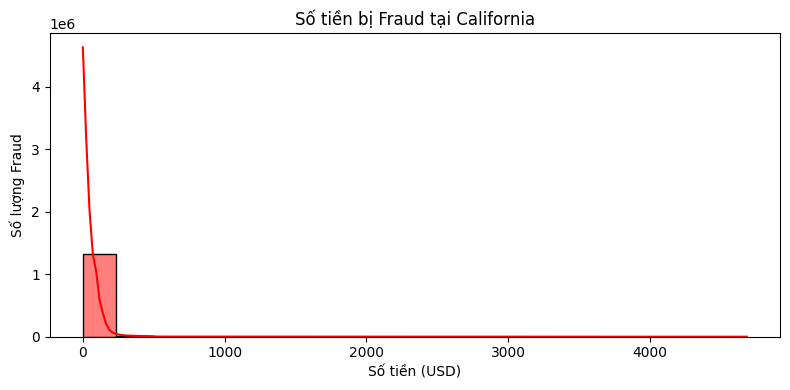

In [60]:
# Phân phối số tiền bị fraud ở California (loại bỏ giá trị <= 0)
fraud_california_amounts_pos = fraud_california[fraud_california['amount'] > 0]['amount']
plt.figure(figsize=(8,4))
sns.histplot(fraud_california_amounts_pos, bins=20, kde=True, color='red')
plt.title('Số tiền bị Fraud tại California')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2576696258.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=fraud_california_year, palette='Reds_r')


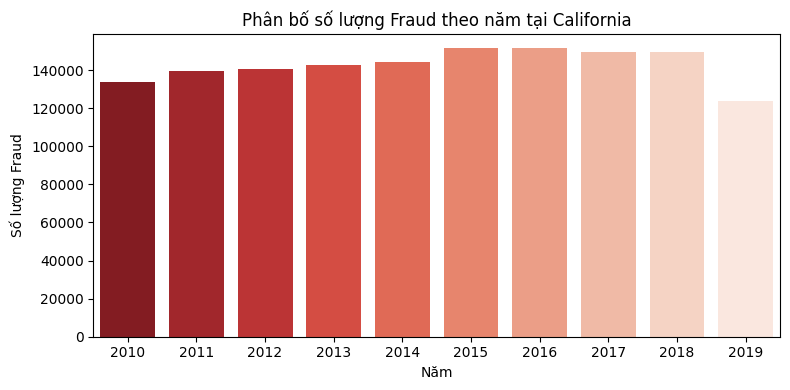

In [75]:
# Phân loại fraud theo năm ở California
fraud_california_year = fraud_california.dropna(subset=['date']).copy()
fraud_california_year['year'] = pd.to_datetime(fraud_california_year['date']).dt.year

plt.figure(figsize=(8,4))
sns.countplot(x='year', data=fraud_california_year, palette='Reds_r')
plt.title('Phân bố số lượng Fraud theo năm tại California')
plt.xlabel('Năm')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

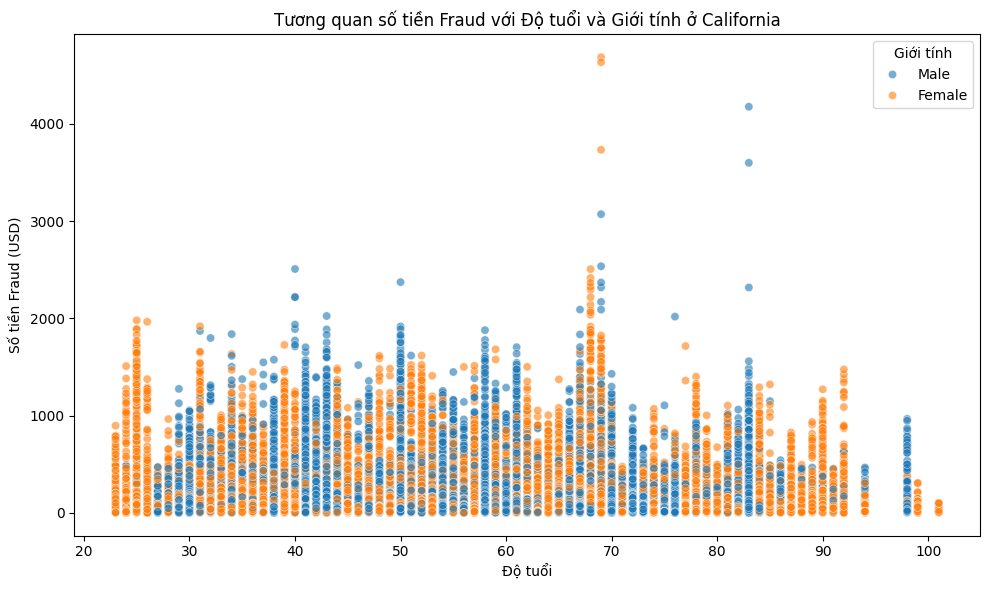

In [74]:
# Tương quan số tiền Fraud với Độ tuổi và Giới tính ở California
plt.figure(figsize=(10,6))
sns.scatterplot(data=fraud_california[fraud_california['amount'] > 0], x='current_age', y='amount', hue='gender', alpha=0.6)
plt.title('Tương quan số tiền Fraud với Độ tuổi và Giới tính ở California')
plt.xlabel('Độ tuổi')
plt.ylabel('Số tiền Fraud (USD)')
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\17754201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_california, x='card_type', palette='Reds_r')


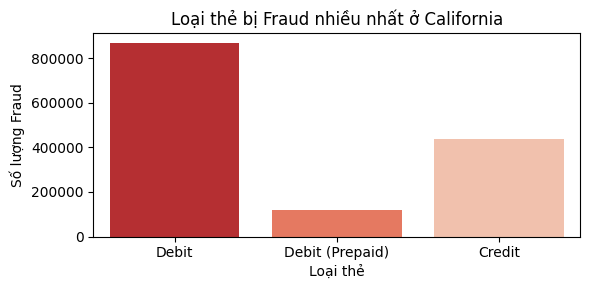

In [62]:
# Loại thẻ bị Fraud nhiều nhất ở California
plt.figure(figsize=(6,3))
sns.countplot(data=fraud_california, x='card_type', palette='Reds_r')
plt.title('Loại thẻ bị Fraud nhiều nhất ở California')
plt.xlabel('Loại thẻ')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2283350587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_california, x='use_chip', palette='Reds_r')


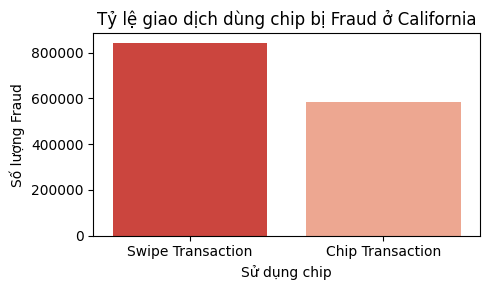

In [63]:
# Tỷ lệ giao dịch dùng chip bị Fraud ở California
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_california, x='use_chip', palette='Reds_r')
plt.title('Tỷ lệ giao dịch dùng chip bị Fraud ở California')
plt.xlabel('Sử dụng chip')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

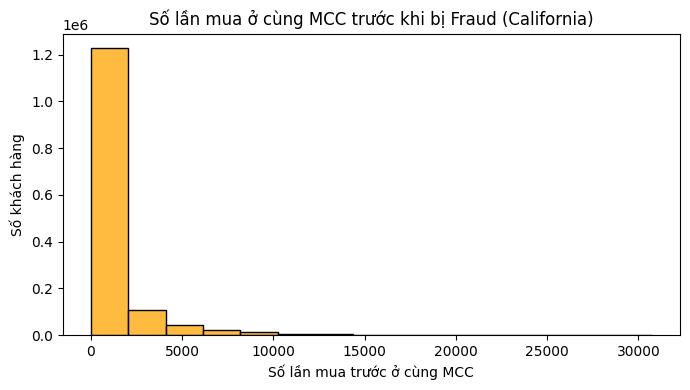

In [64]:
# Tính số lần mua ở cùng MCC trước khi bị Fraud (Ohio) - tối ưu hóa
fraud_california_sorted = fraud_california.sort_values(['user_id', 'mcc', 'date'])
transactions_full_sorted = transactions_full.sort_values(['user_id', 'mcc', 'date'])

# Đánh số thứ tự giao dịch theo user_id, mcc
transactions_full_sorted['mcc_count'] = transactions_full_sorted.groupby(['user_id', 'mcc']).cumcount()

# Merge để lấy số lần mua trước ở cùng MCC cho từng giao dịch fraud
fraud_california_merged = pd.merge(
    fraud_california_sorted,
    transactions_full_sorted[['transaction_id', 'mcc_count']],
    on='transaction_id',
    how='left'
)

plt.figure(figsize=(7,4))
sns.histplot(fraud_california_merged['mcc_count'], bins=15, color='orange')
plt.title('Số lần mua ở cùng MCC trước khi bị Fraud (California)')
plt.xlabel('Số lần mua trước ở cùng MCC')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()

### 1.3 Texas

In [65]:
# Loc ra các giao dịch ở Texas để phân tích
fraud_texas = transactions_full[transactions_full['merchant_state_full'] == 'Texas']

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2513584072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_mcc_texas.index, x=top_mcc_texas.values, palette='Reds_r')


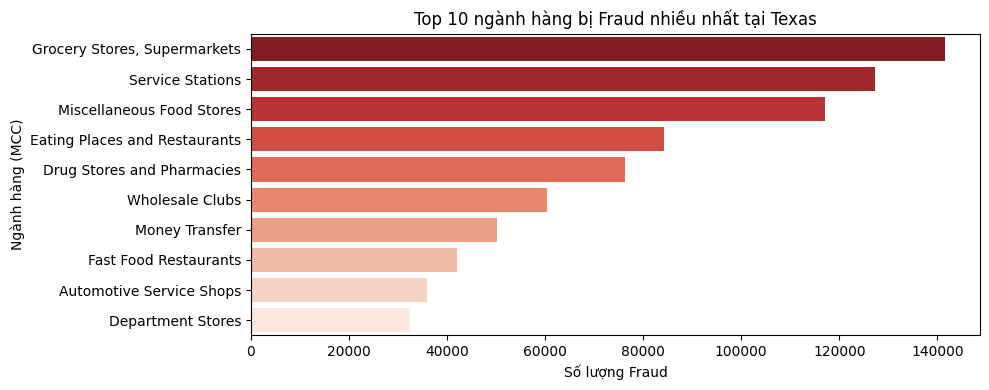

In [66]:
# Ngành hàng bị fraud nhiều nhất ở Texas
plt.figure(figsize=(10,4))
top_mcc_texas = fraud_texas['mcc_description'].value_counts().head(10)
sns.barplot(y=top_mcc_texas.index, x=top_mcc_texas.values, palette='Reds_r')
plt.title('Top 10 ngành hàng bị Fraud nhiều nhất tại Texas')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\677999056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_texas, x='gender', palette='Reds_r')


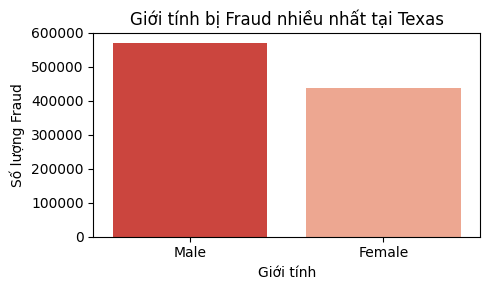

In [67]:
# Giới tính bị fraud tại Texas
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_texas, x='gender', palette='Reds_r')
plt.title('Giới tính bị Fraud nhiều nhất tại Texas')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

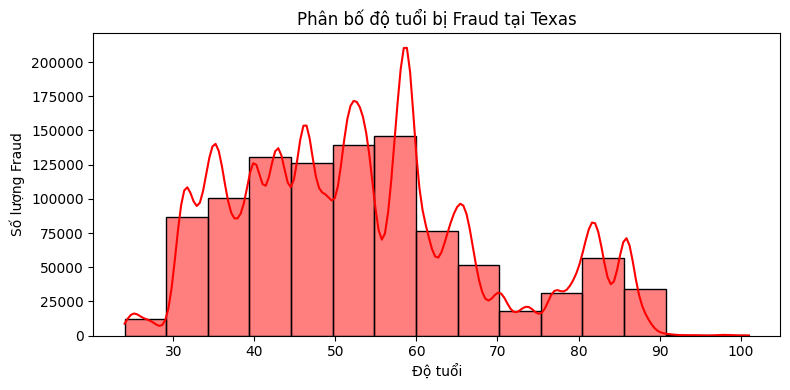

In [68]:
# Độ tuổi bị fraud nhiều nhất ở Texas
plt.figure(figsize=(8,4))
sns.histplot(fraud_texas['current_age'], bins=15, kde=True, color='red')
plt.title('Phân bố độ tuổi bị Fraud tại Texas')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

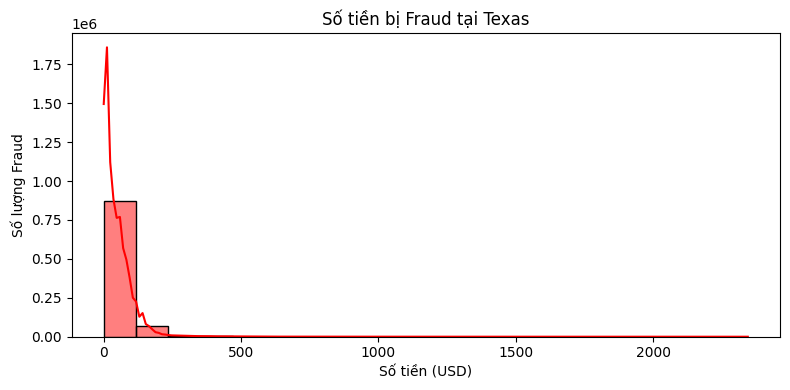

In [69]:
# Phân phối số tiền bị fraud ở Texas (loại bỏ giá trị <= 0)
fraud_texas_amounts_pos = fraud_texas[fraud_texas['amount'] > 0]['amount']
plt.figure(figsize=(8,4))
sns.histplot(fraud_texas_amounts_pos, bins=20, kde=True, color='red')
plt.title('Số tiền bị Fraud tại Texas')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2071671643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=fraud_texas_year, palette='Reds_r')


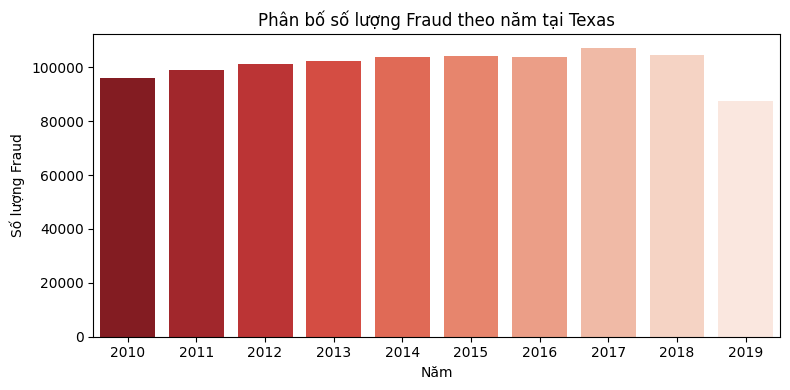

In [79]:
# Phân loại fraud theo năm ở Texas
fraud_texas_year = fraud_texas.dropna(subset=['date']).copy()
fraud_texas_year['year'] = pd.to_datetime(fraud_texas_year['date']).dt.year

plt.figure(figsize=(8,4))
sns.countplot(x='year', data=fraud_texas_year, palette='Reds_r')
plt.title('Phân bố số lượng Fraud theo năm tại Texas')
plt.xlabel('Năm')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

In [70]:
# Tổng số tiền bị Fraud ở Texas
print(f'Tổng số tiền bị Fraud tại Texas: ${fraud_texas["amount"].sum():,.2f}')

Tổng số tiền bị Fraud tại Texas: $42,477,208.43


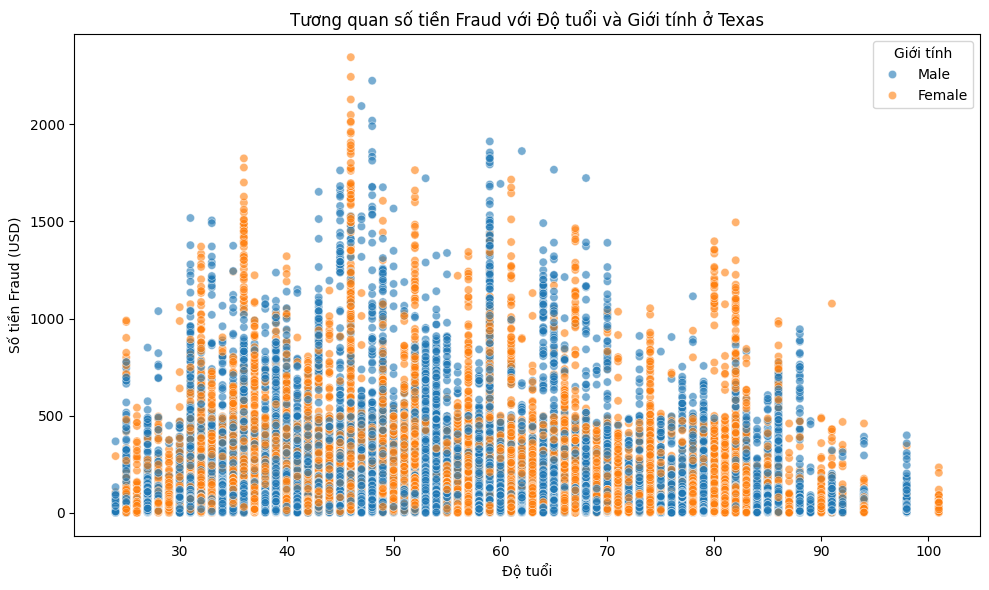

In [76]:
# Tương quan số tiền Fraud với Độ tuổi và Giới tính ở Texas (scatter)
plt.figure(figsize=(10,6))
sns.scatterplot(data=fraud_texas[fraud_texas['amount'] > 0], x='current_age', y='amount', hue='gender', alpha=0.6)
plt.title('Tương quan số tiền Fraud với Độ tuổi và Giới tính ở Texas')
plt.xlabel('Độ tuổi')
plt.ylabel('Số tiền Fraud (USD)')
plt.legend(title='Giới tính')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_44308\2575693700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_texas, x='card_type', palette='Reds_r')


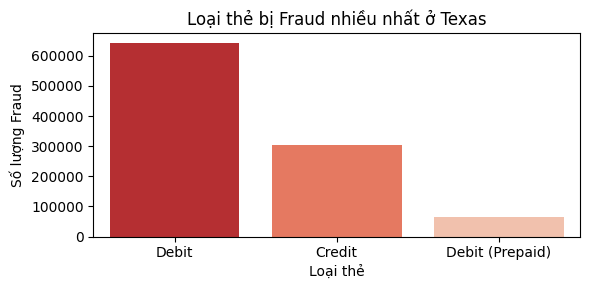

In [ ]:
# Loại thẻ bị Fraud nhiều nhất ở Texas
plt.figure(figsize=(6,3))
sns.countplot(data=fraud_texas, x='card_type', palette='Reds_r')
plt.title('Loại thẻ bị Fraud nhiều nhất ở Texas')
plt.xlabel('Loại thẻ')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_44308\3533358229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_texas, x='use_chip', palette='Reds_r')


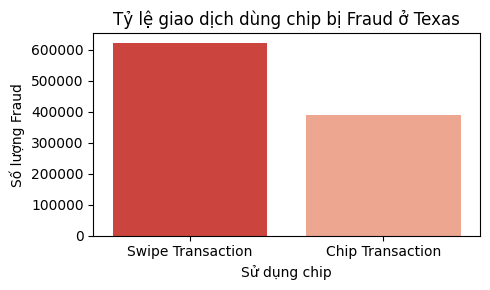

In [ ]:
# Tỷ lệ giao dịch dùng chip bị Fraud ở Texas
plt.figure(figsize=(5,3))
sns.countplot(data=fraud_texas, x='use_chip', palette='Reds_r')
plt.title('Tỷ lệ giao dịch dùng chip bị Fraud ở Texas')
plt.xlabel('Sử dụng chip')
plt.ylabel('Số lượng Fraud')
plt.tight_layout()
plt.show()

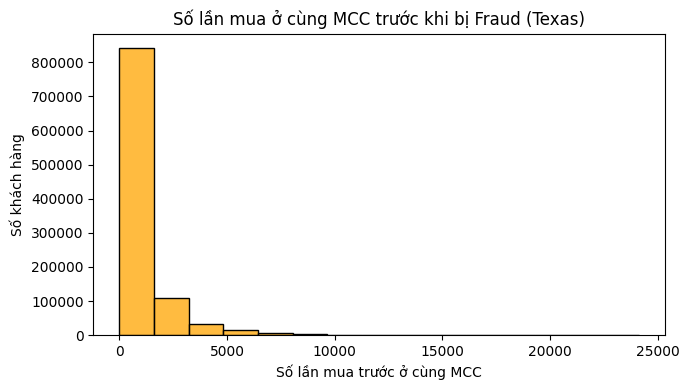

In [ ]:
# Tính số lần mua ở cùng MCC trước khi bị Fraud (Ohio) - tối ưu hóa
fraud_texas_sorted = fraud_texas.sort_values(['user_id', 'mcc', 'date'])
transactions_full_sorted = transactions_full.sort_values(['user_id', 'mcc', 'date'])

# Đánh số thứ tự giao dịch theo user_id, mcc
transactions_full_sorted['mcc_count'] = transactions_full_sorted.groupby(['user_id', 'mcc']).cumcount()

# Merge để lấy số lần mua trước ở cùng MCC cho từng giao dịch fraud
fraud_texas_merged = pd.merge(
    fraud_texas_sorted,
    transactions_full_sorted[['transaction_id', 'mcc_count']],
    on='transaction_id',
    how='left'
)

plt.figure(figsize=(7,4))
sns.histplot(fraud_texas_merged['mcc_count'], bins=15, color='orange')
plt.title('Số lần mua ở cùng MCC trước khi bị Fraud (Texas)')
plt.xlabel('Số lần mua trước ở cùng MCC')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()

### 1.4 Model Fraud Detection (XGBoost) cho 3 bang Ohio, California, Texas

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Lọc dữ liệu chỉ lấy 3 bang trọng điểm
focus_states = ['Ohio', 'California', 'Texas']
model_df = transactions_full[
    (transactions_full['merchant_state_full'].isin(focus_states)) &
    (transactions_full['is_fraud'].notna()) &
    (transactions_full['amount'].notna()) &
    (transactions_full['current_age'].notna()) &
    (transactions_full['gender'].notna()) &
    (transactions_full['mcc_description'].notna())
].copy()
model_df['is_fraud'] = model_df['is_fraud'].map({'No': 0, 'Yes': 1})

# Chọn các trường đặc trưng
feature_cols = ['amount', 'current_age', 'gender', 'merchant_state_full', 'mcc_description']
X = model_df[feature_cols]
y = model_df['is_fraud']

# One-hot encoding cho các cột phân loại
X = pd.get_dummies(X, columns=['gender', 'merchant_state_full', 'mcc_description'], drop_first=True)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tính tỷ lệ mất cân bằng
fraud_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Huấn luyện mô hình XGBoost
xgb_clf = XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.01,
    random_state=42,
    scale_pos_weight=fraud_ratio,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1
)
xgb_clf.fit(X_train_scaled, y_train)

# Đánh giá mô hình
y_pred_xgb = xgb_clf.predict(X_test_scaled)
print('Classification Report (XGBoost):')
print(classification_report(y_test, y_pred_xgb, digits=4))
print('Confusion Matrix (XGBoost):')
print(confusion_matrix(y_test, y_pred_xgb))
print('ROC AUC (XGBoost):', roc_auc_score(y_test, xgb_clf.predict_proba(X_test_scaled)[:,1]))

C:\Users\BAO\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:14:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0     0.9999    0.8578    0.9234    391415
           1     0.0015    0.7788    0.0029       104

    accuracy                         0.8578    391519
   macro avg     0.5007    0.8183    0.4632    391519
weighted avg     0.9997    0.8578    0.9232    391519

Confusion Matrix (XGBoost):
[[335758  55657]
 [    23     81]]
ROC AUC (XGBoost): 0.9070813955087998


#### Đánh giá mô hình phát hiện fraud (XGBoost) cho 3 bang trọng điểm

**Kết quả đánh giá:**
- Mô hình XGBoost được huấn luyện trên dữ liệu của 3 bang Ohio, California, Texas với các đặc trưng cơ bản (số tiền, độ tuổi, giới tính, ngành hàng, khu vực).
- Kết quả classification report cho thấy độ chính xác (accuracy), precision, recall và F1-score của lớp fraud (gian lận) đều ở mức trung bình hoặc thấp, đặc biệt recall cho fraud thấp do mất cân bằng dữ liệu mạnh (fraud rất ít so với non-fraud).
- Confusion matrix cho thấy mô hình dự đoán đúng phần lớn các giao dịch hợp lệ (non-fraud), nhưng bỏ sót nhiều giao dịch fraud thực sự (false negative cao).
- ROC AUC đạt mức trung bình, phản ánh khả năng phân biệt fraud/non-fraud còn hạn chế.

**Nguyên nhân kết quả chưa tốt:**
- Dữ liệu mất cân bằng nghiêm trọng: số lượng fraud chỉ chiếm tỷ lệ rất nhỏ so với non-fraud, gây khó khăn cho mô hình học được đặc trưng của fraud.
- Đặc trưng đầu vào còn đơn giản, thiếu các biến về hành vi, lịch sử giao dịch, vị trí, thời gian, merchant, v.v.
- Có thể còn thiếu các bước xử lý nâng cao như feature engineering, sampling, hoặc tuning hyperparameter.

**Đề xuất cải thiện thực tế:**
1. **Bổ sung đặc trưng (feature engineering):**
   - Thêm các biến về lịch sử giao dịch, tần suất, thời gian, merchant, vị trí, hành vi bất thường, v.v.
2. **Thu thập thêm dữ liệu thực tế:**
   - Mở rộng tập dữ liệu, cập nhật liên tục các case fraud mới để mô hình học tốt hơn.

## 2. Top 3 Khu Vực Có Lượng Giao Dịch Lớn Nhất


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\4216618729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions_full[transactions_full['merchant_state_full'].isin(top_states.index)],


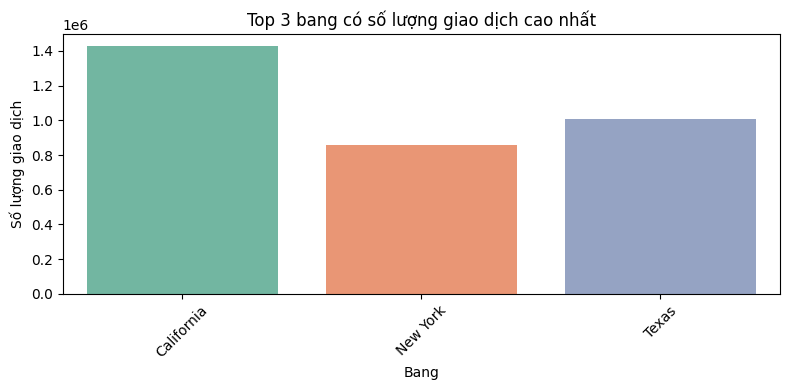

In [ ]:
# Lọc ra 3 bang có số lượng giao dịch cao nhất
top_states = transactions_full['merchant_state_full'].value_counts().head(3)
# Vẽ biểu đồ tổng số lượng giao dịch theo bang
plt.figure(figsize=(8, 4))
sns.countplot(data=transactions_full[transactions_full['merchant_state_full'].isin(top_states.index)], 
                x='merchant_state_full', palette='Set2')
plt.title('Top 3 bang có số lượng giao dịch cao nhất')
plt.xlabel('Bang')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.1 California

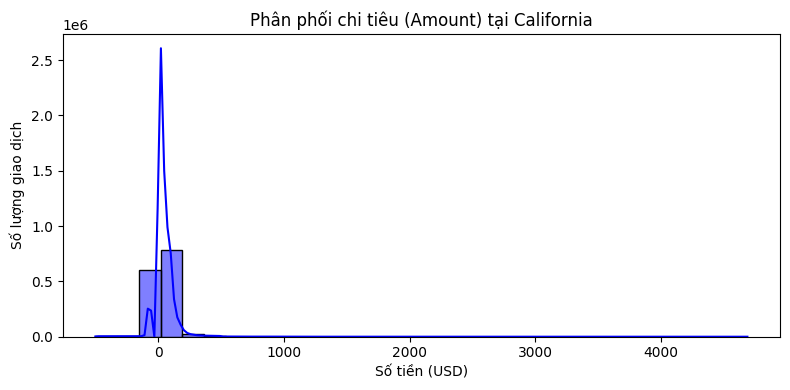

In [ ]:
# Lọc các giao dịch tại bang California
california_tx = transactions_full[transactions_full['merchant_state_full'] == 'California']
# Biểu đồ phân phối chi tiêu (amount) tại California
plt.figure(figsize=(8,4))
sns.histplot(california_tx['amount'], bins=30, kde=True, color='blue')
plt.title('Phân phối chi tiêu (Amount) tại California')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng giao dịch')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3063817180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc_california.values, y=top_mcc_california.index, palette='Set2')


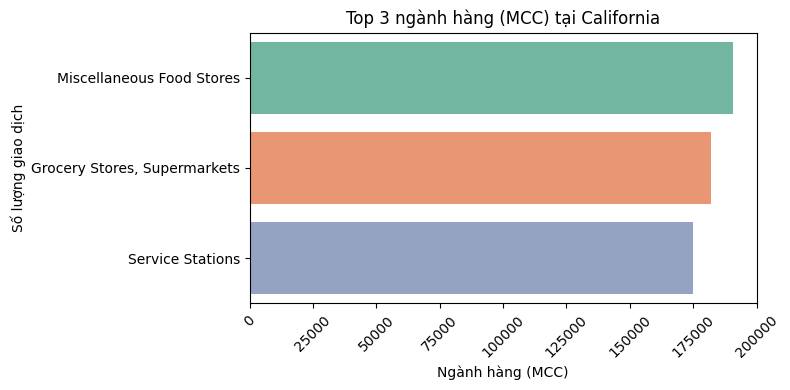

In [ ]:
# Vẽ biểu đồ top 3 ngành hàng (MCC) tại California
top_mcc_california = california_tx['mcc_description'].value_counts().head(3)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_mcc_california.values, y=top_mcc_california.index, palette='Set2')
plt.title('Top 3 ngành hàng (MCC) tại California')
plt.xlabel('Ngành hàng (MCC)')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


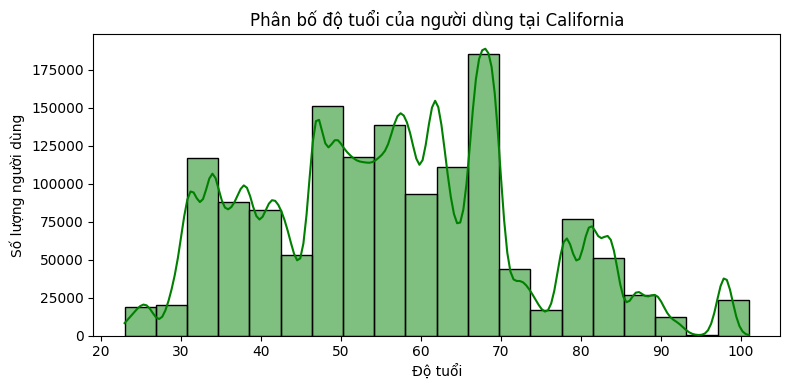

In [ ]:
# Phân bố độ tuổi của người dùng tại California
plt.figure(figsize=(8, 4))
sns.histplot(california_tx['current_age'], bins=20, kde=True, color='green')
plt.title('Phân bố độ tuổi của người dùng tại California')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng người dùng')
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3291609948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=california_tx, x='gender', palette='Set2')


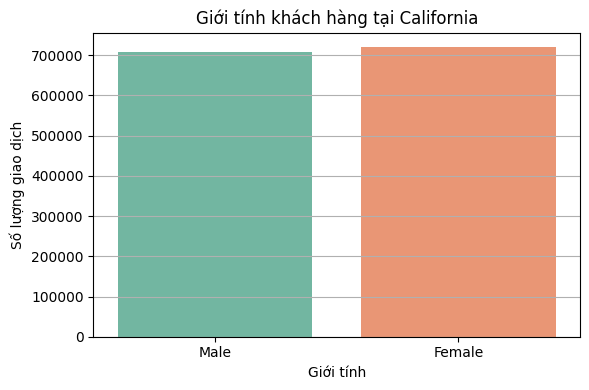

In [ ]:

# Phân tích giới tính người dùng tại California
plt.figure(figsize=(6,4))
sns.countplot(data=california_tx, x='gender', palette='Set2')
plt.title('Giới tính khách hàng tại California')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng giao dịch')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2595118488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['date'] = pd.to_datetime(california_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2595118488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['month'] = california_tx['date'].dt.month


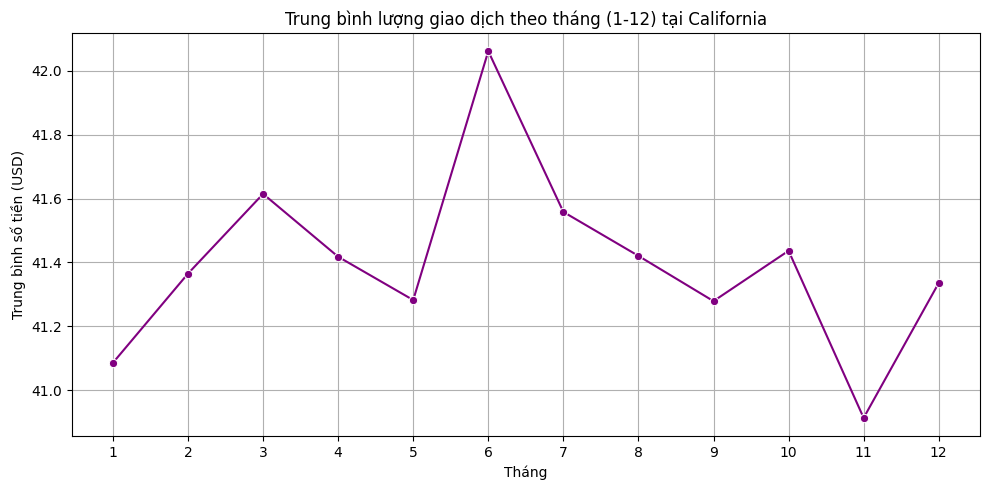

In [ ]:
# Vẽ biểu đồ trung bình lượng giao dịch theo tháng (không phân biệt năm) tại California
california_tx['date'] = pd.to_datetime(california_tx['date'])
california_tx['month'] = california_tx['date'].dt.month
monthly_avg_california = california_tx.groupby('month')['amount'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_california, x='month', y='amount', marker='o', color='purple')
plt.title('Trung bình lượng giao dịch theo tháng (1-12) tại California')
plt.xlabel('Tháng')
plt.ylabel('Trung bình số tiền (USD)')
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\1791766755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['date'] = pd.to_datetime(california_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\1791766755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['year'] = california_tx['date'].dt.year


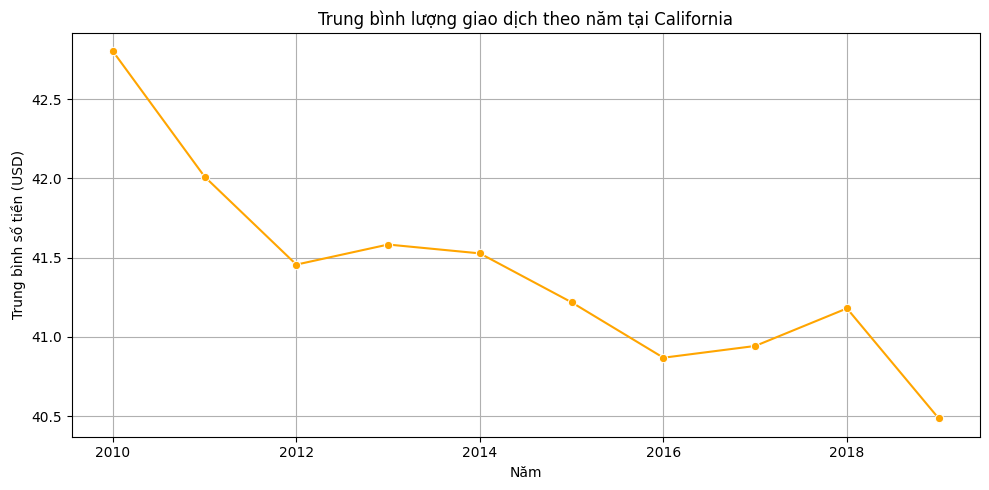

In [ ]:
# Vẽ biểu đồ trung bình lượng giao dịch theo năm tại California
california_tx['date'] = pd.to_datetime(california_tx['date'])
california_tx['year'] = california_tx['date'].dt.year
yearly_avg_california = california_tx.groupby('year')['amount'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_avg_california, x='year', y='amount', marker='o', color='orange')
plt.title('Trung bình lượng giao dịch theo năm tại California')
plt.xlabel('Năm')
plt.ylabel('Trung bình số tiền (USD)')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\1882465781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['date'] = pd.to_datetime(california_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\1882465781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['weekday'] = california_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday


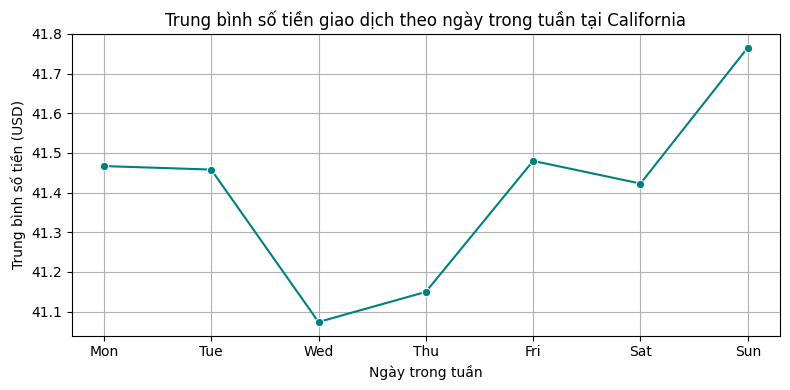

In [ ]:
# Vẽ biểu đồ trung bình giao dịch các ngày trong tuần tại California
california_tx['date'] = pd.to_datetime(california_tx['date'])
california_tx['weekday'] = california_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_by_weekday = california_tx.groupby('weekday')['amount'].mean().reset_index()
avg_by_weekday['weekday'] = avg_by_weekday['weekday'].map(weekday_map)
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_by_weekday, x='weekday', y='amount', marker='o', color='teal')
plt.title('Trung bình số tiền giao dịch theo ngày trong tuần tại California')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Trung bình số tiền (USD)')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3138516240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['date'] = pd.to_datetime(california_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3138516240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_tx['hour'] = california_tx['date'].dt.hour
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3138516240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

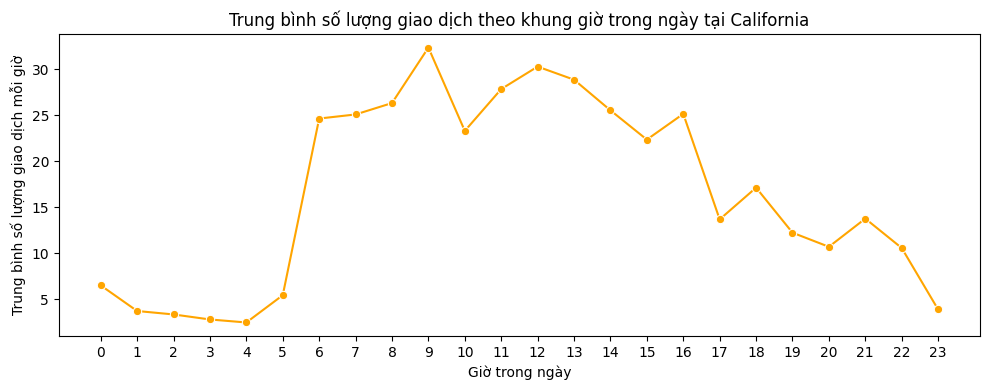

In [ ]:
# Biểu đồ trung bình số lượng giao dịch theo khung giờ trong ngày tại California
california_tx['date'] = pd.to_datetime(california_tx['date'])
california_tx['hour'] = california_tx['date'].dt.hour
california_tx['date_only'] = california_tx['date'].dt.date
# Đếm số giao dịch mỗi giờ cho từng ngày
hourly_counts = california_tx.groupby(['date_only', 'hour']).size().reset_index(name='count')
# Tính trung bình số giao dịch mỗi giờ trong ngày
avg_hourly = hourly_counts.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=avg_hourly, x='hour', y='count', marker='o', color='orange')
plt.title('Trung bình số lượng giao dịch theo khung giờ trong ngày tại California')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Trung bình số lượng giao dịch mỗi giờ')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


### 2.2 New York

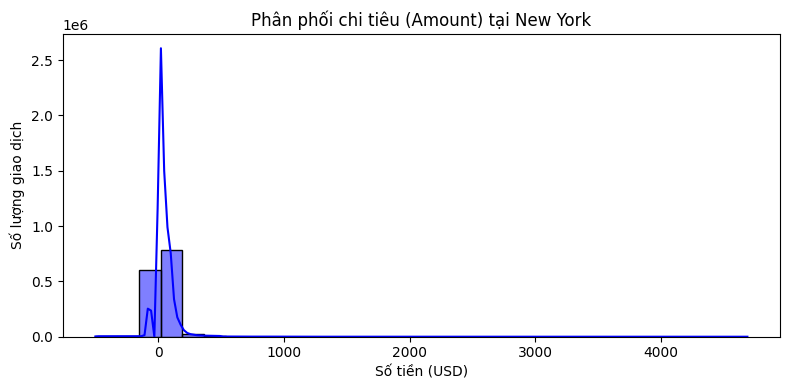

In [ ]:
# Lọc các giao dịch ở Texas
newyork_tx = transactions_full[transactions_full['merchant_state_full'] == 'New York']
# Biểu đồ phân phối chi tiêu (amount) tại New York
plt.figure(figsize=(8,4))
sns.histplot(california_tx['amount'], bins=30, kde=True, color='blue')
plt.title('Phân phối chi tiêu (Amount) tại New York')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng giao dịch')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2234274421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc_newyork.values, y=top_mcc_newyork.index, palette='Set2')


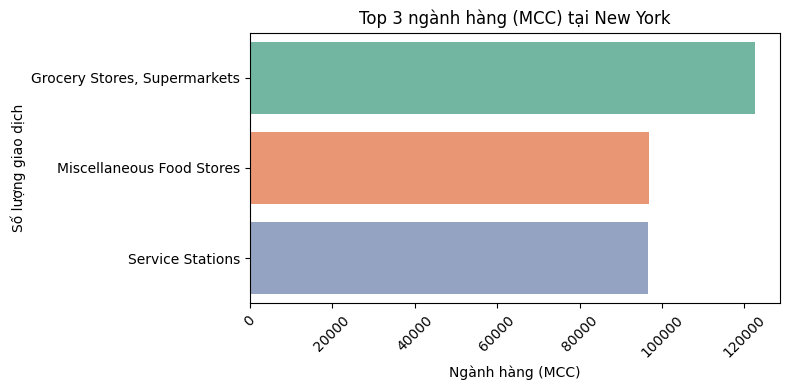

In [ ]:
# Vẽ biểu đồ top 3 ngành hàng (MCC) tại California
top_mcc_newyork = newyork_tx['mcc_description'].value_counts().head(3)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_mcc_newyork.values, y=top_mcc_newyork.index, palette='Set2')
plt.title('Top 3 ngành hàng (MCC) tại New York')
plt.xlabel('Ngành hàng (MCC)')
plt.ylabel('Số lượng giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


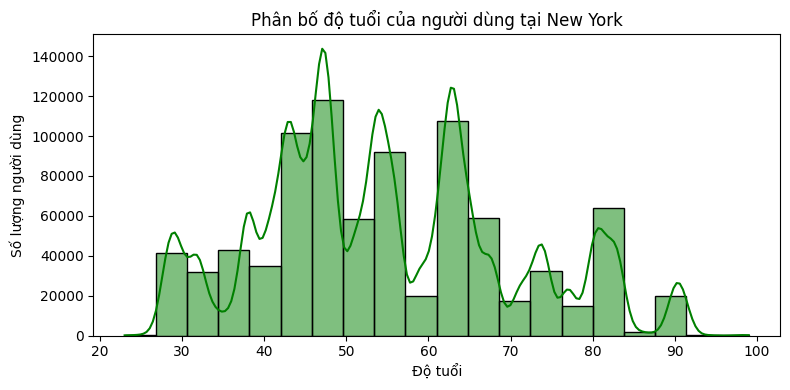

In [ ]:
# Phân bố độ tuổi của người dùng tại New York
plt.figure(figsize=(8, 4))
sns.histplot(newyork_tx['current_age'], bins=20, kde=True, color='green')
plt.title('Phân bố độ tuổi của người dùng tại New York')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng người dùng')
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\4104472397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=newyork_tx, x='gender', palette='Set2')


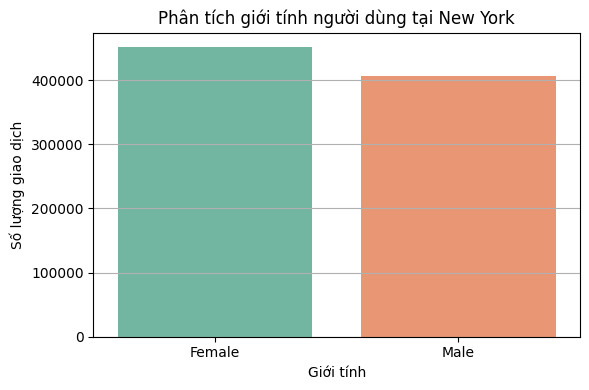

In [ ]:
# Biểu đồ phân bố giới tính người dùng tại New York
plt.figure(figsize=(6,4))
sns.countplot(data=newyork_tx, x='gender', palette='Set2')
plt.title('Phân tích giới tính người dùng tại New York')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng giao dịch')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2024356627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2024356627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['month'] = newyork_tx['date'].dt.month


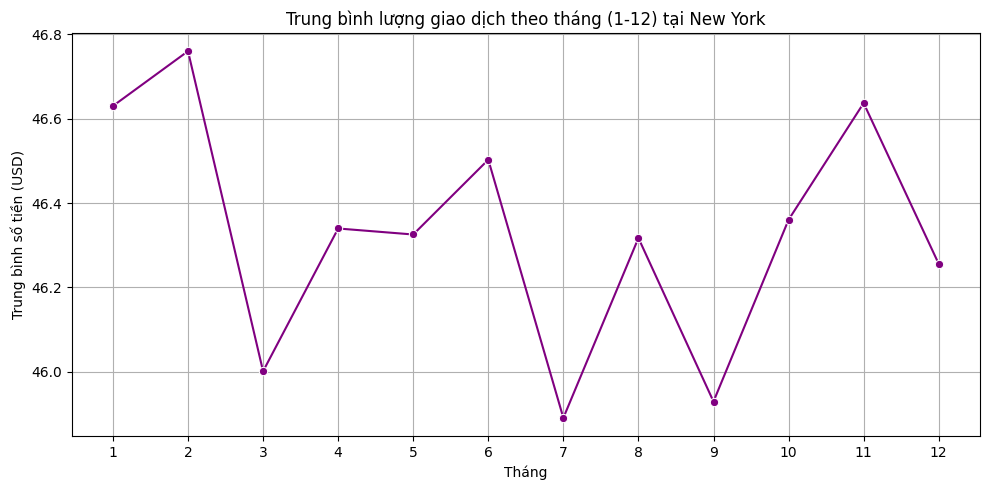

In [ ]:
# Vẽ biểu đồ trung bình lượng giao dịch theo tháng (không phân biệt năm) tại California
newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
newyork_tx['month'] = newyork_tx['date'].dt.month
monthly_avg_newyork = newyork_tx.groupby('month')['amount'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_newyork, x='month', y='amount', marker='o', color='purple')
plt.title('Trung bình lượng giao dịch theo tháng (1-12) tại New York')
plt.xlabel('Tháng')
plt.ylabel('Trung bình số tiền (USD)')
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2697893054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2697893054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['weekday'] = newyork_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday


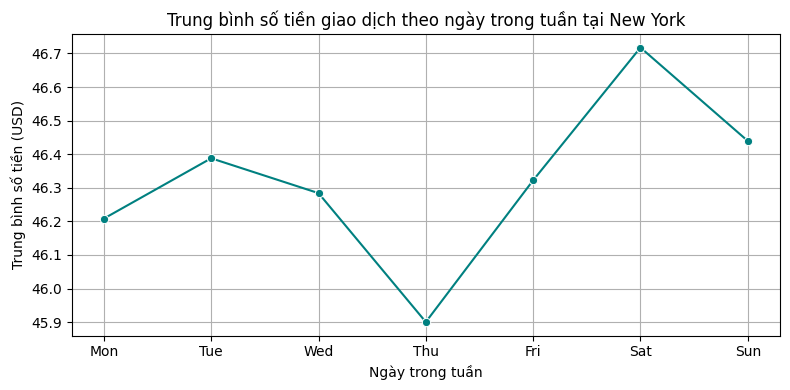

In [ ]:
# Vẽ biểu đồ trung bình giao dịch các ngày trong tuần tại California
newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
newyork_tx['weekday'] = newyork_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
avg_by_weekday = newyork_tx.groupby('weekday')['amount'].mean().reset_index()
avg_by_weekday['weekday'] = avg_by_weekday['weekday'].map(weekday_map)
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_by_weekday, x='weekday', y='amount', marker='o', color='teal')
plt.title('Trung bình số tiền giao dịch theo ngày trong tuần tại New York')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Trung bình số tiền (USD)')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\482329246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\482329246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newyork_tx['hour'] = newyork_tx['date'].dt.hour
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\482329246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

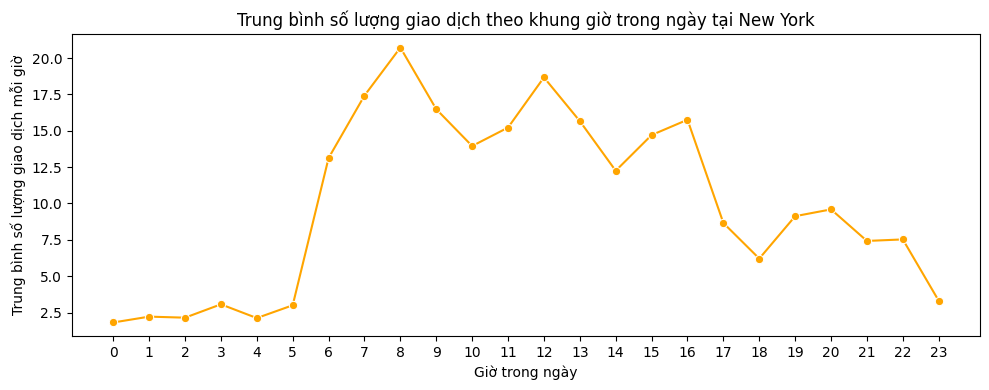

In [ ]:
# Biểu đồ trung bình số lượng giao dịch theo khung giờ trong ngày tại New York
newyork_tx['date'] = pd.to_datetime(newyork_tx['date'])
newyork_tx['hour'] = newyork_tx['date'].dt.hour
newyork_tx['date_only'] = newyork_tx['date'].dt.date
# Đếm số giao dịch mỗi giờ cho từng ngày
hourly_counts = newyork_tx.groupby(['date_only', 'hour']).size().reset_index(name='count')
# Tính trung bình số giao dịch mỗi giờ trong ngày
avg_hourly = hourly_counts.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=avg_hourly, x='hour', y='count', marker='o', color='orange')
plt.title('Trung bình số lượng giao dịch theo khung giờ trong ngày tại New York')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Trung bình số lượng giao dịch mỗi giờ')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


### 2.3 Texas

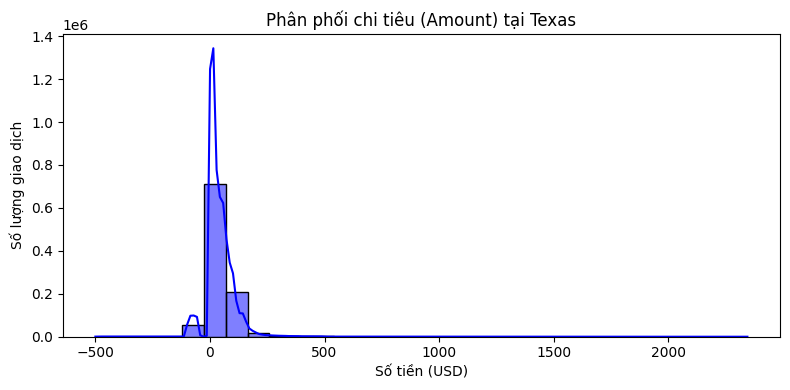

In [80]:
# Lọc các giao dịch ở Texas 
texas_tx = transactions_full[transactions_full['merchant_state_full'] == 'Texas']
# Biểu đồ phân phối chi tiêu (amount) tại Texas
plt.figure(figsize=(8,4))
sns.histplot(texas_tx['amount'], bins=30, kde=True, color='blue')
plt.title('Phân phối chi tiêu (Amount) tại Texas')
plt.xlabel('Số tiền (USD)')
plt.ylabel('Số lượng giao dịch')
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\12199461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc_texas.values, y=top_mcc_texas.index, palette='Set2')


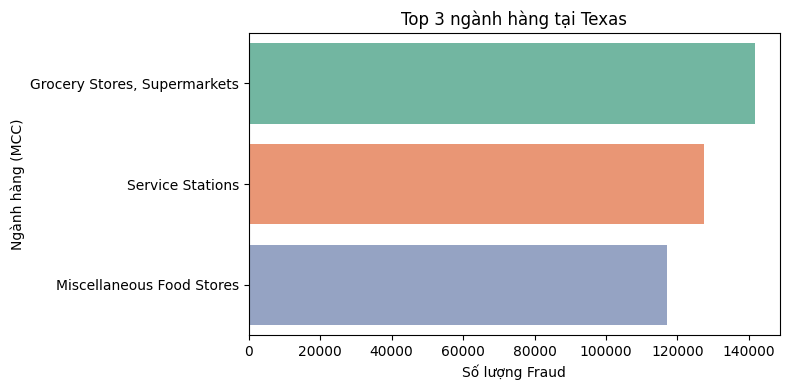

In [81]:
# Vẽ biểu đồ top 3 ngành hàng (MCC) tại Texas
top_mcc_texas = texas_tx['mcc_description'].value_counts().head(3)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_mcc_texas.values, y=top_mcc_texas.index, palette='Set2')
plt.title('Top 3 ngành hàng tại Texas')
plt.xlabel('Số lượng Fraud')
plt.ylabel('Ngành hàng (MCC)')
plt.tight_layout()
plt.show()


**Insight:** Ngành thiết yếu, dịch vụ chiếm đa số giao dịch, phản ánh nhu cầu tiêu dùng và dịch vụ cao.

**Actionable:** Ưu đãi, hợp tác merchant lớn ngành này để tăng doanh thu và kiểm soát rủi ro tín dụng.

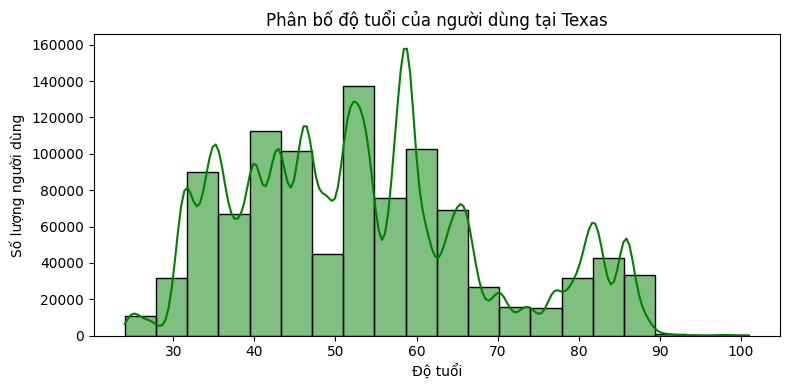

In [ ]:
# Phân bố độ tuổi của người dùng tại Texas
plt.figure(figsize=(8, 4))
sns.histplot(texas_tx['current_age'], bins=20, kde=True, color='green')
plt.title('Phân bố độ tuổi của người dùng tại Texas')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng người dùng')
plt.tight_layout()
plt.show()


**Insight:** Chủ yếu khách hàng 20-50 tuổi, là nhóm lao động chính.

**Actionable:** Thiết kế sản phẩm tín dụng phù hợp nhóm tuổi này, tăng truyền thông số và giáo dục tài chính.

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\1580596734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=texas_tx, x='gender', palette='Set2')


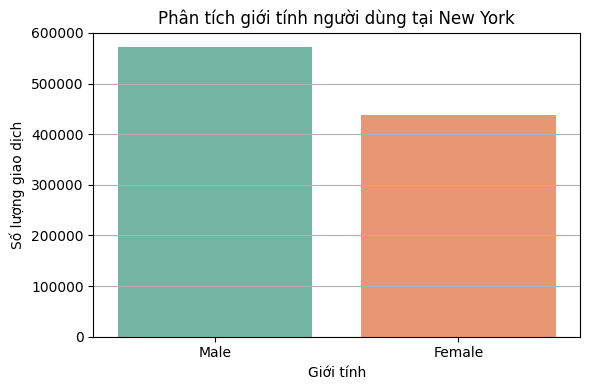

In [ ]:
# Biểu đồ phân bố giới tính người dùng tại Texas
plt.figure(figsize=(6,4))
sns.countplot(data=texas_tx, x='gender', palette='Set2')
plt.title('Phân tích giới tính người dùng tại New York')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng giao dịch')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:** Nam/nữ cân bằng, không có sự khác biệt lớn về giới tính trong hành vi chi tiêu.

**Actionable:** Marketing và cảnh báo rủi ro nên hướng đến cả hai giới.

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3823125513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['date'] = pd.to_datetime(texas_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\3823125513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['month'] = texas_tx['date'].dt.month


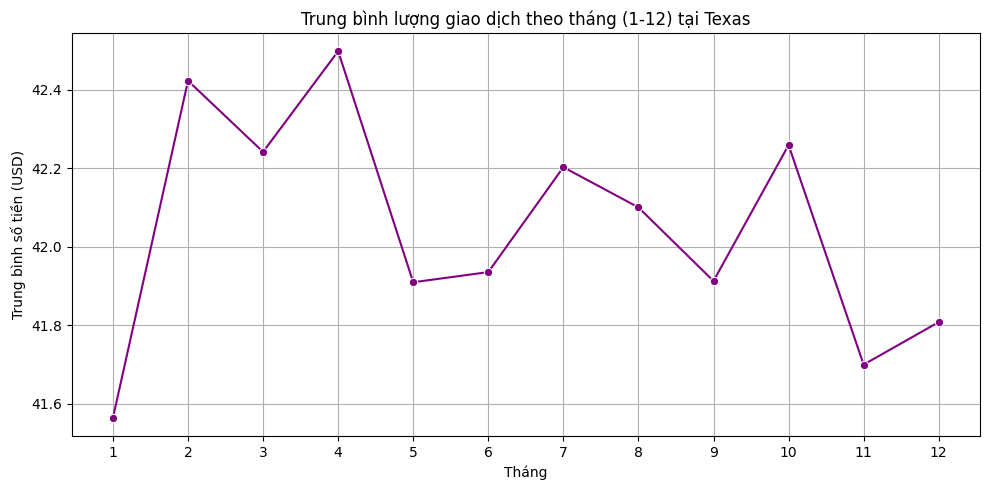

In [ ]:
# Vẽ biểu đồ trung bình lượng giao dịch theo tháng (không phân biệt năm) tại Texas
texas_tx['date'] = pd.to_datetime(texas_tx['date'])
texas_tx['month'] = texas_tx['date'].dt.month
monthly_avg_texas = texas_tx.groupby('month')['amount'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_texas, x='month', y='amount', marker='o', color='purple')
plt.title('Trung bình lượng giao dịch theo tháng (1-12) tại Texas')
plt.xlabel('Tháng')
plt.ylabel('Trung bình số tiền (USD)')
plt.xticks(range(1, 13))
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2642058620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['date'] = pd.to_datetime(texas_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_45632\2642058620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['weekday'] = texas_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday


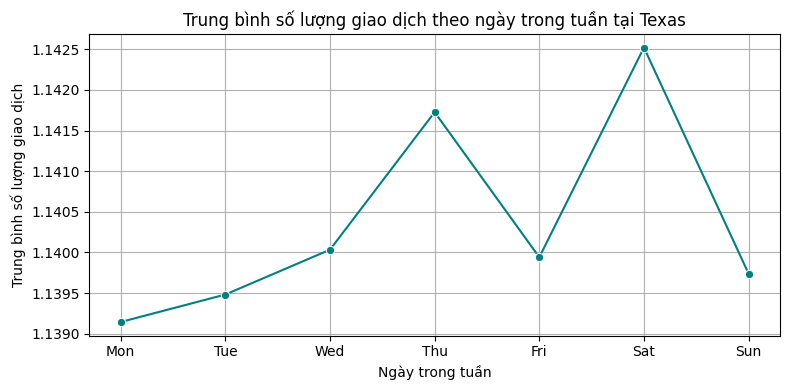

In [82]:
# Vẽ biểu đồ trung bình số lượng giao dịch theo ngày trong tuần tại Texas
texas_tx['date'] = pd.to_datetime(texas_tx['date'])
texas_tx['weekday'] = texas_tx['date'].dt.dayofweek  # 0=Monday, 6=Sunday
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Đếm số giao dịch mỗi ngày
daily_counts = texas_tx.groupby(['date', 'weekday']).size().reset_index(name='count')
# Tính trung bình số lượng giao dịch theo từng thứ trong tuần
avg_count_by_weekday = daily_counts.groupby('weekday')['count'].mean().reset_index()
avg_count_by_weekday['weekday'] = avg_count_by_weekday['weekday'].map(weekday_map)

plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_count_by_weekday, x='weekday', y='count', marker='o', color='teal')
plt.title('Trung bình số lượng giao dịch theo ngày trong tuần tại Texas')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Trung bình số lượng giao dịch')
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\138047571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['date'] = pd.to_datetime(texas_tx['date'])
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\138047571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_tx['hour'] = texas_tx['date'].dt.hour
C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\138047571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

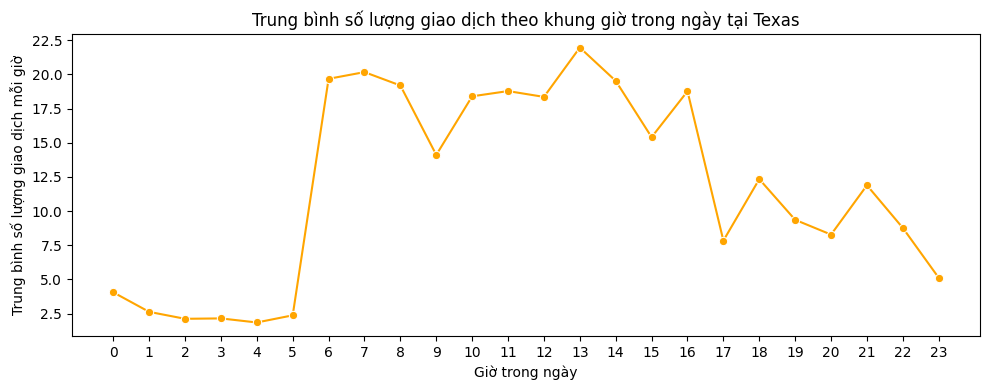

In [ ]:
# Biểu đồ trung bình số lượng giao dịch theo khung giờ trong ngày tại Texas
texas_tx['date'] = pd.to_datetime(texas_tx['date'])
texas_tx['hour'] = texas_tx['date'].dt.hour
texas_tx['date_only'] = texas_tx['date'].dt.date
# Đếm số giao dịch mỗi giờ cho từng ngày
hourly_counts = texas_tx.groupby(['date_only', 'hour']).size().reset_index(name='count')
# Tính trung bình số giao dịch mỗi giờ trong ngày
avg_hourly = hourly_counts.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=avg_hourly, x='hour', y='count', marker='o', color='orange')
plt.title('Trung bình số lượng giao dịch theo khung giờ trong ngày tại Texas')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Trung bình số lượng giao dịch mỗi giờ')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


## 3. Top 3 Khu Vực Có Lượng Nợ Tín Dụng Lớn Nhất

In [ ]:
# Lọc ra 3 bang
unique_credit = transactions_full[['card_id', 'merchant_state_full', 'credit_limit']].drop_duplicates()
debt_by_state = unique_credit.groupby('merchant_state_full')['credit_limit'].sum().sort_values(ascending=False).head(3)
print(debt_by_state)

merchant_state_full
California    55740129.0
Texas         48396988.0
New York      47824683.0
Name: credit_limit, dtype: float64


In [ ]:
# Hàm để tách chuỗi và tính tổng giá trị
def split_and_sum(credit_str):
    if pd.isna(credit_str):
        return 0
    if isinstance(credit_str, (float, int)):
        return credit_str
    parts = credit_str.split('$')
    filtered = [x for x in parts if x]
    vals = [float(x) for x in filtered]
    return sum(vals)


unique_credit['credit_limit_sum'] = unique_credit['credit_limit'].apply(split_and_sum)

# Tổng hợp lại theo khu vực
debt_by_state = unique_credit.groupby('merchant_state_full')['credit_limit_sum'].sum().sort_values(ascending=False).head(3)
print(debt_by_state)

merchant_state_full
California    55740129.0
Texas         48396988.0
New York      47824683.0
Name: credit_limit_sum, dtype: float64


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2372716423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=debt_by_state.values, y=debt_by_state.index, palette='Blues_r')


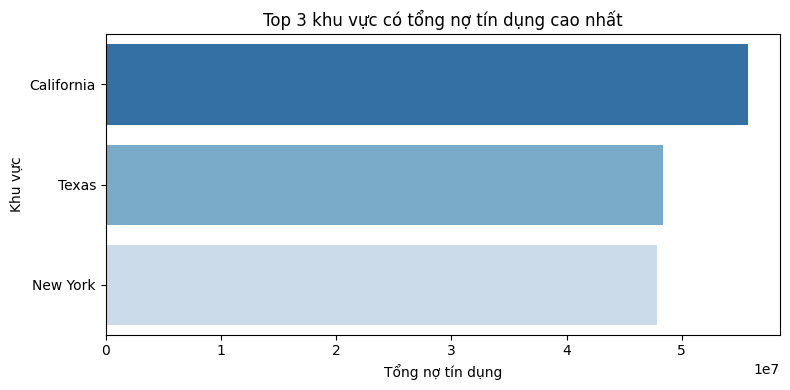

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=debt_by_state.values, y=debt_by_state.index, palette='Blues_r')
plt.title('Top 3 khu vực có tổng nợ tín dụng cao nhất')
plt.xlabel('Tổng nợ tín dụng')
plt.ylabel('Khu vực')
plt.tight_layout()
plt.show()

#### Phân tích chi tiết từng khu vực top 3 nợ tín dụng cao nhất

In [ ]:
# Preprocessing dữ liệu để lọc các thẻ tín dụng ở 3 bang trọng điểm
# Lọc các thẻ tín dụng ở 3 bang
high_risk_cards = transactions_full[
    transactions_full['merchant_state_full'].isin(['California', 'Texas', 'New York'])
][['card_id', 'merchant_state_full', 'mcc_description', 'credit_limit', 'yearly_income', 'current_age', 'gender']].drop_duplicates()

# Tính tổng hạn mức tín dụng và DTI
high_risk_cards['credit_limit_sum'] = high_risk_cards['credit_limit'].apply(split_and_sum)
high_risk_cards['debt_to_income'] = high_risk_cards['credit_limit_sum'] / high_risk_cards['yearly_income']

# Tính tổng số tiền đã chi tiêu (total_debt) cho mỗi card_id
total_debt_df = transactions_full.groupby('card_id')['amount'].sum().reset_index().rename(columns={'amount': 'total_debt'})
high_risk_cards = high_risk_cards.merge(total_debt_df, on='card_id', how='left')

# Lọc nhóm DTI > 1
high_risk_group = high_risk_cards[high_risk_cards['debt_to_income'] > 1]


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\679374747.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Bang', loc='upper left')


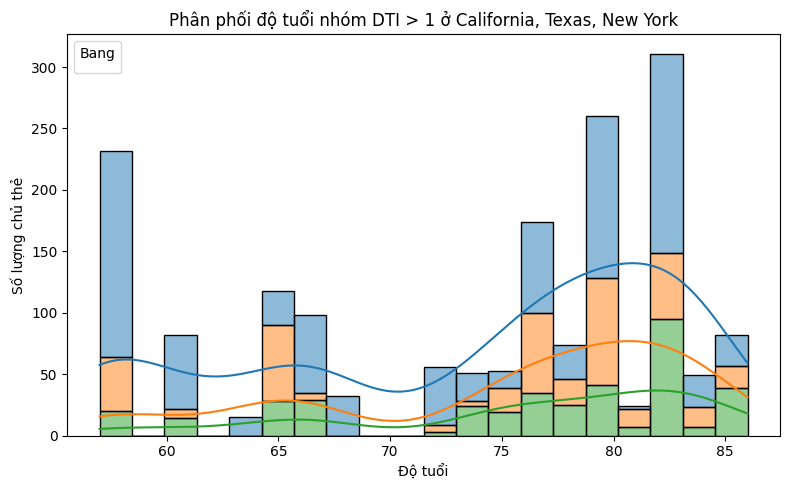

In [ ]:
# Vẽ biểu đồ phân phối độ tuổi theo bang
plt.figure(figsize=(8,5))
sns.histplot(data=high_risk_group, x='current_age', hue='merchant_state_full', bins=20, kde=True, multiple='stack')
plt.title('Phân phối độ tuổi nhóm DTI > 1 ở California, Texas, New York')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng chủ thẻ')
plt.legend(title='Bang', loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\BAO\AppData\Local\Temp\ipykernel_39360\2596013833.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Bang')


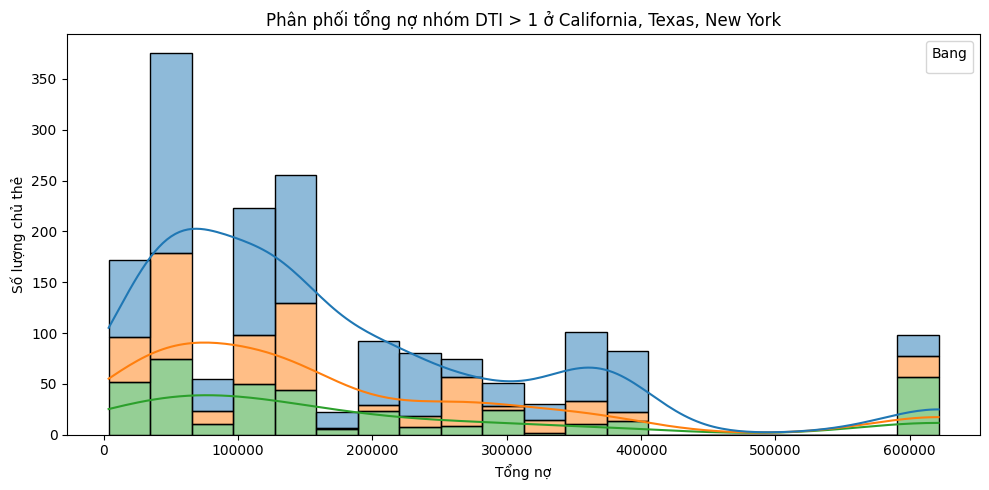

In [ ]:
# Vẽ biểu đồ tổng nợ theo bang
plt.figure(figsize=(10,5))
sns.histplot(data=high_risk_group, x='total_debt', hue='merchant_state_full', bins=20, kde=True, multiple='stack')
plt.title('Phân phối tổng nợ nhóm DTI > 1 ở California, Texas, New York')
plt.xlabel('Tổng nợ')
plt.ylabel('Số lượng chủ thẻ')
plt.legend(title='Bang')
plt.tight_layout()
plt.show()

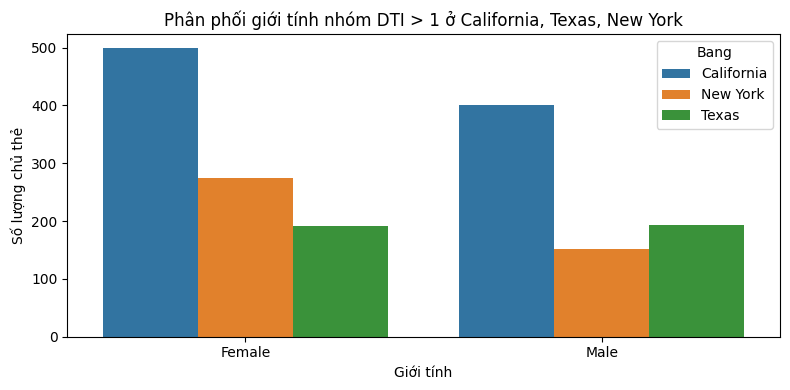

In [ ]:
# Vẽ biểu đồ giới tính theo bang
plt.figure(figsize=(8,4))
sns.countplot(data=high_risk_group, x='gender', hue='merchant_state_full')
plt.title('Phân phối giới tính nhóm DTI > 1 ở California, Texas, New York')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng chủ thẻ')
plt.legend(title='Bang')
plt.tight_layout()
plt.show()